# MASTFM

> !! To make this process cleaner, instructions to create an isolated environment are available in `README.md`, which also specify how to clean everything afterwards.

`mastfm` stands for Meta-learning and data Augmentation for Stress Testing. It provides tools to interpret forecasting models by leveraging meta-learning techniques and various data augmentation methods.

#### Links:

>
> [GitHub](https://github.com/ricardoinaciopt/mastfm)
>
> [pypi](https://pypi.org/project/mastfm/)
>

## Installation

You can install the `mastfm` package using pip:

```console
$ pip install mastfm
```

To make the process more straightforward, it is already installed in the environment

### Dataset

The M3 monthly dataset contains 1428 time series from various domains including demographic, micro, industry, macro, finance, and other categories, used in the M3 forecasting competition.

Lets load it:

In [ ]:
from datasetsforecast.m3 import M3

df, *_ = M3().load(directory="datasets", group="Monthly")

### Forecasting Model

XGBoost Regressor is a powerful supervised machine learning algorithm that uses an ensemble of decision trees for regression tasks, employing gradient boosting techniques to sequentially build trees that learn from previous errors.

In [ ]:
# MacOS users: to use this package, libomp is required. You can install it using Homebrew, if you don't have it yet:
# !brew install libomp

from xgboost import XGBRegressor as xgboost

Initialize MASTFM, passing all arguments:

In [ ]:
from mastfm import MASTFM

mastfm = MASTFM(
    forecasting_model=xgboost(), # forecasting model, compatible with the scikit-learn pipeline.
    seasonality=12, # data seasonality, or length of the seasonal cycles.
    frequency="M", # frequency of the dataset.
    horizon=12, # forecasting horizon. Number of steps into the future to predict.
    level=90, # confidence interval level. Given that the metamodel is calibrated, contains the real value 90% of the time. Allows to compute uncertainty intervals.
    quantile=80, # quantile to serve as threshold for stress.
    target="errors", # type of stress to gauge. It can be "errors", "uncertainty", or "hubris".
    augmentation_method="ADASYN", # type of augmentation method. It can be a meta-features oversampler, or a synthetic time series generator.
)

# Fit the method, using the specified dataset.
mastfm.fit(df=df, target_differences=1) # pass the dataframe, and the transformations to apply to the data. For now, only differences are supported.

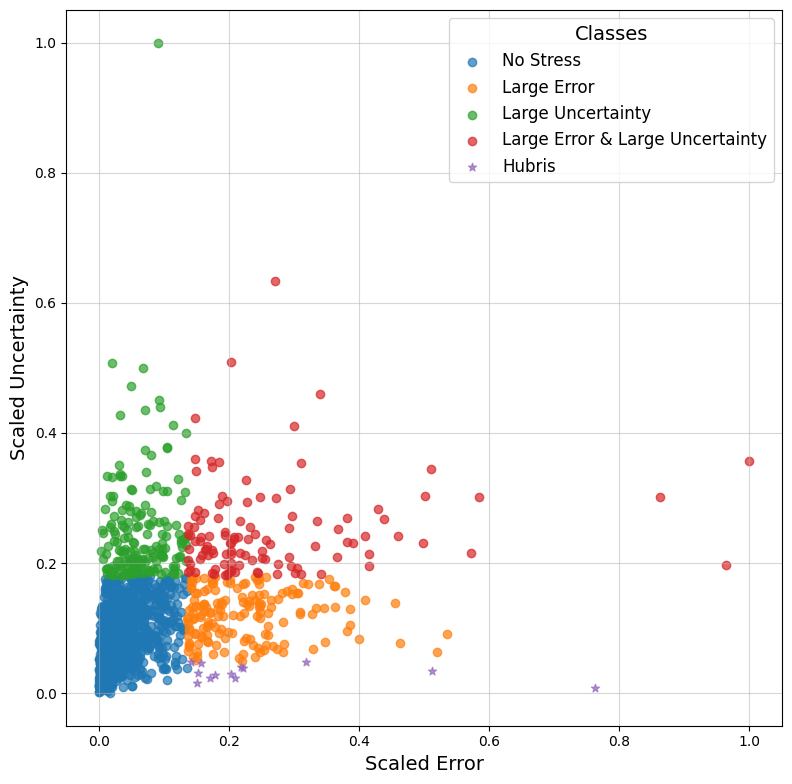

In [5]:
# Plot each data point, and the corresponding stress class.
mastfm.plot_stress()

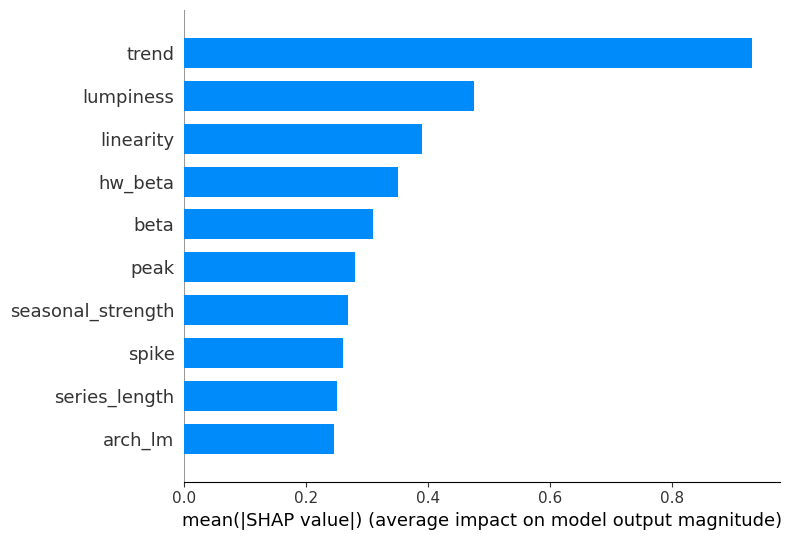

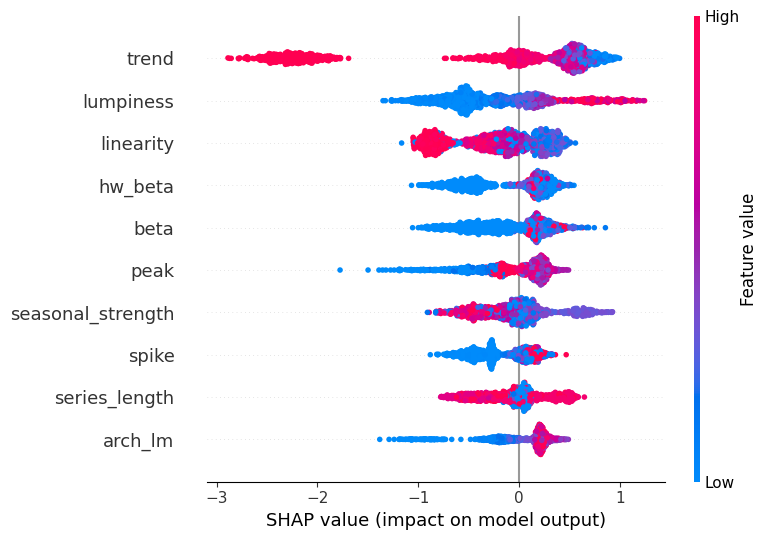

In [6]:
# Display the most relevant features, and their importance to the metamodel using SHAP.
mastfm.explanations()

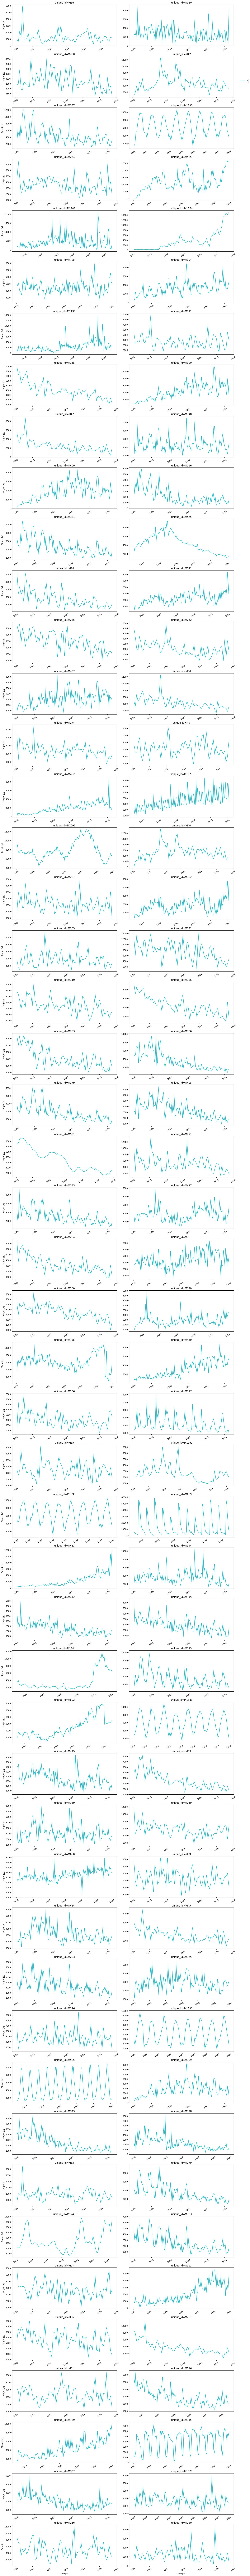

In [7]:
# Plot the stress-inducing time series. For now, only for visualisation purposes.
mastfm.plot_stress_series()